# 📌 Proyecto: Modelos de Decisión, Bayes y Regresión con Airbnb NYC  
### 🇪🇸 Español  
En este proyecto utilizamos el dataset de **Airbnb New York City** para entrenar varios modelos clásicos de análisis cuantitativo:

1. Árbol de decisión sencillo (EMV, sensibilidad, EVPI).  
2. Cálculo Bayesiano (PPV).  
3. Regresión múltiple para predecir `price`.

El dataset contiene más de 36.000 propiedades con información geográfica, de demanda y precios.

---

### 🇬🇧 English  
In this project, we use the **Airbnb New York City** dataset to build several classic quantitative models:

1. Simple decision tree (EMV, sensitivity analysis, EVPI).  
2. Bayesian calculation (PPV).  
3. Multiple regression to predict `price`.

The dataset includes over 36,000 Airbnb listings with geographic, demand, and pricing information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

In [2]:
# let pandas auto-detect the delimiter and skip malformed lines to avoid parser errors
#
#	'/Users/cecilialedesma/Library/Mobile Documents/com~apple~CloudDocs/projects_2025/decision_models_project/listings.csv',
#	sep=None,            # auto-detect delimiter (requires engine='python')
#	engine='python',
#	on_bad_lines='skip', # skip lines with wrong number of fields
#	encoding='utf-8'
#)

## 🇪🇸 Carga del dataset  
Cargamos el archivo `listings.csv` desde la ruta local y revisamos las primeras observaciones.

## 🇬🇧 Loading the dataset  
We load the `listings.csv` file from the local directory and inspect the first rows.

In [3]:
path = "/Users/cecilialedesma/Library/Mobile Documents/com~apple~CloudDocs/projects_2025/decision_models_project/listings.csv"
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Studio Oasis | Midtown Manhattan Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.24,3,289,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,30,195,2025-06-09,0.98,1,285,3,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,30,1,2022-06-05,0.02,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,73.0,30,249,2025-05-27,1.28,1,186,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN


In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Studio Oasis | Midtown Manhattan Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.24,3,289,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,96.0,30,195,2025-06-09,0.98,1,285,3,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,59.0,30,1,2022-06-05,0.02,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,73.0,30,249,2025-05-27,1.28,1,186,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.07,2,0,0,NaN


## 🇪🇸 Información general  
Revisamos tipos de datos, cantidad de nulos y estructura general del dataframe.

## 🇬🇧 General information  
We inspect data types, missing values, and overall dataframe structure.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36111 entries, 0 to 36110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36111 non-null  int64  
 1   name                            36109 non-null  object 
 2   host_id                         36111 non-null  int64  
 3   host_name                       34945 non-null  object 
 4   neighbourhood_group             36111 non-null  object 
 5   neighbourhood                   36111 non-null  object 
 6   latitude                        36111 non-null  float64
 7   longitude                       36111 non-null  float64
 8   room_type                       36111 non-null  object 
 9   price                           21328 non-null  float64
 10  minimum_nights                  36111 non-null  int64  
 11  number_of_reviews               36111 non-null  int64  
 12  last_review                     

In [6]:
df.isna().mean().sort_values(ascending=False).head(20)

license                           0.851126
price                             0.409377
last_review                       0.309822
reviews_per_month                 0.309822
host_name                         0.032289
name                              0.000055
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

# 🇪🇸 Selección de variables  
Seleccionamos las columnas relevantes para los modelos de decisión, Bayes y regresión.  
Usaremos variables numéricas (`price`, `reviews_per_month`, etc.) y categóricas (`room_type`, `neighbourhood_group`).

# 🇬🇧 Feature selection  
We select relevant columns for the decision model, Bayesian analysis, and regression.  
We include numerical variables (`price`, `reviews_per_month`, etc.) and categorical ones (`room_type`, `neighbourhood_group`).

In [7]:
cols_model = [
    'longitude', 'latitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'number_of_reviews_ltm',
    'neighbourhood_group', 'neighbourhood', 'room_type', 'price'
]

df_model = df[cols_model].copy()
df_model.head()

,longitude,latitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group,neighbourhood,room_type,price
0,-73.98559,40.75356,30,47,0.24,3,289,0,Manhattan,Midtown,Entire home/apt,240.0
1,-73.95342,40.70935,30,195,0.98,1,285,3,Brooklyn,Williamsburg,Entire home/apt,96.0
2,-73.94255,40.80107,30,1,0.02,2,83,0,Manhattan,East Harlem,Private room,59.0
3,-73.94759,40.78778,30,249,1.28,1,186,4,Manhattan,East Harlem,Private room,73.0
4,-73.95881,40.71248,30,13,0.07,2,0,0,Brooklyn,Williamsburg,Private room,NaN


# 🇪🇸 Análisis de valores faltantes  
Calculamos cuántos nulos hay por columna y el porcentaje correspondiente.

# 🇬🇧 Missing value analysis  
We calculate the number and percentage of missing values per column.

In [8]:
n_nulls = df_model.isna().sum()
pct_nulls = df_model.isna().mean() * 100

null_summary = pd.DataFrame({
    "n_nulls": n_nulls,
    "pct_nulls": pct_nulls.round(2)
}).sort_values("pct_nulls", ascending=False)

null_summary

,n_nulls,pct_nulls
price,14783,40.94
reviews_per_month,11188,30.98
longitude,0,0.00
latitude,0,0.00
minimum_nights,0,0.00
number_of_reviews,0,0.00
calculated_host_listings_count,0,0.00
availability_365,0,0.00
number_of_reviews_ltm,0,0.00
neighbourhood_group,0,0.00


## 🇪🇸 Reglas de limpieza  
- `price` no puede tener nulos (variable objetivo).  
- `reviews_per_month` tiene demasiados nulos → los eliminamos para simplificar.

## 🇬🇧 Cleaning rules  
- `price` can't be null (target variable).  
- `reviews_per_month` has too many missing values → we drop those rows for simplicity.

In [9]:
df_model = df_model.dropna(subset=['price', 'reviews_per_month']).reset_index(drop=True)
df_model.isna().sum()

longitude                         0
latitude                          0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
dtype: int64

# 🇪🇸 Exploratory Data Analysis (EDA)  
Vamos a analizar la distribución de precios, tipos de habitación, barrios y correlaciones.

# 🇬🇧 Exploratory Data Analysis (EDA)  
We analyze price distribution, room types, neighborhoods, and correlations.


In [10]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14944.0,-73.940191,0.063124,-74.249440,-73.982313,-73.95021,-73.917750,-73.713650
latitude,14944.0,40.725229,0.060545,40.500366,40.682690,40.72257,40.762964,40.912017
minimum_nights,14944.0,24.633097,22.149691,1.000000,15.000000,30.00000,30.000000,500.000000
number_of_reviews,14944.0,52.327088,97.713642,1.000000,4.000000,18.00000,63.000000,3736.000000
reviews_per_month,14944.0,1.153395,2.333030,0.010000,0.170000,0.46000,1.430000,122.760000
calculated_host_listings_count,14944.0,33.451151,127.191927,1.000000,1.000000,2.00000,8.000000,1148.000000
availability_365,14944.0,241.128613,107.702413,0.000000,153.000000,270.00000,335.000000,365.000000
number_of_reviews_ltm,14944.0,9.043897,29.191173,0.000000,0.000000,1.00000,5.000000,1699.000000
price,14944.0,349.515792,2627.869167,10.000000,91.000000,150.00000,242.000000,50104.000000


## 🇪🇸 Distribución del precio (sin filtrar)  
## 🇬🇧 Price distribution (unfiltered)


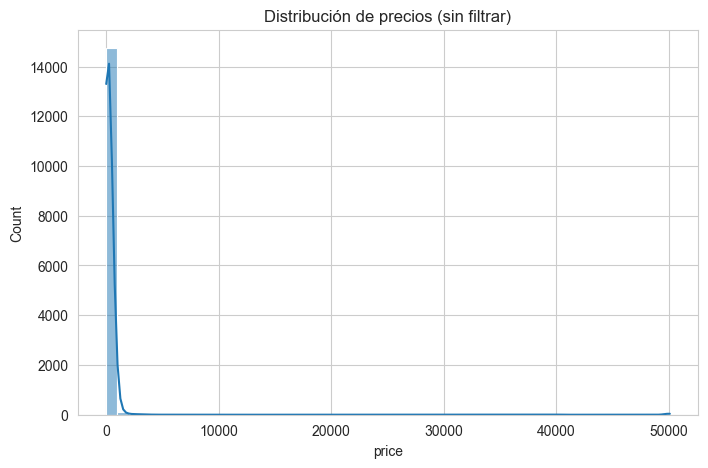

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df_model['price'], bins=50, kde=True)
plt.title("Distribución de precios (sin filtrar)")
plt.show()

# 🇪🇸 Filtrado de outliers  
Definimos precios razonables para evitar valores extremos:  
- `price > 0`  
- `price ≤ 500`

# 🇬🇧 Outlier filtering  
We keep only reasonable price ranges to avoid extreme values:  
- `price > 0`  
- `price ≤ 500`

In [12]:
df_model_clean = df_model[(df_model['price'] > 0) & (df_model['price'] <= 500)].copy()
df_model_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14050.0,-73.938074,0.063919,-74.249440,-73.980710,-73.948295,-73.915545,-73.713650
latitude,14050.0,40.724534,0.061452,40.500366,40.681812,40.720333,40.763064,40.912017
minimum_nights,14050.0,25.130320,21.986366,1.000000,30.000000,30.000000,30.000000,500.000000
number_of_reviews,14050.0,53.054448,99.317414,1.000000,4.000000,18.000000,64.000000,3736.000000
reviews_per_month,14050.0,1.147421,2.363742,0.010000,0.170000,0.460000,1.410000,122.760000
calculated_host_listings_count,14050.0,31.451103,117.521551,1.000000,1.000000,2.000000,8.000000,1148.000000
availability_365,14050.0,240.535943,107.927594,0.000000,152.000000,270.000000,335.000000,365.000000
number_of_reviews_ltm,14050.0,8.930747,29.632410,0.000000,0.000000,1.000000,5.000000,1699.000000
price,14050.0,166.678292,102.850792,10.000000,90.000000,142.000000,220.000000,500.000000


## 🇪🇸 Precio por tipo de habitación  
## 🇬🇧 Price by room type

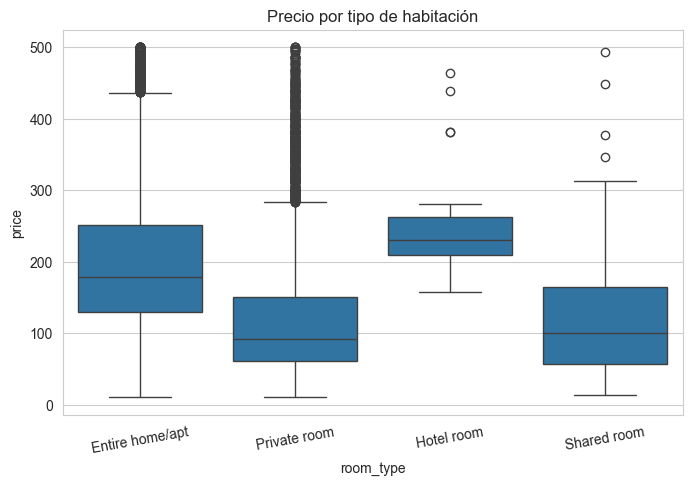

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_model_clean, x='room_type', y='price')
plt.title("Precio por tipo de habitación")
plt.xticks(rotation=10)
plt.show()

## 🇪🇸 Precio por zona  
## 🇬🇧 Price by neighborhood group

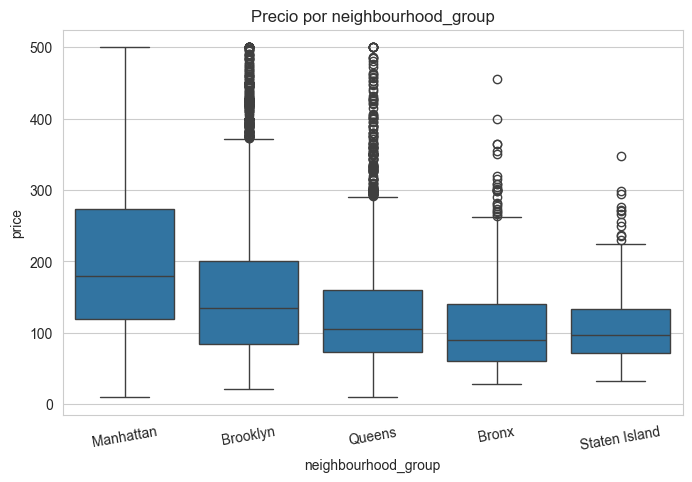

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_model_clean, x='neighbourhood_group', y='price')
plt.title("Precio por neighbourhood_group")
plt.xticks(rotation=10)
plt.show()

## 🇪🇸 Correlaciones entre variables numéricas  
## 🇬🇧 Correlations between numerical variables

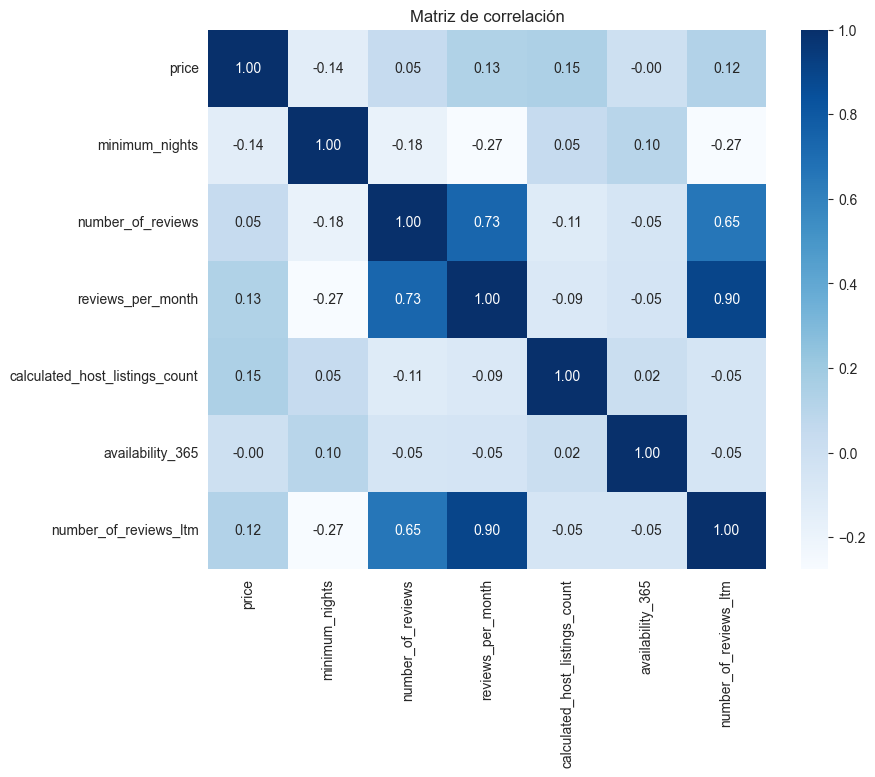

In [15]:
num_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'
]

plt.figure(figsize=(9,7))
sns.heatmap(df_model_clean[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## 3. Métrica de demanda / Demand metric

En esta sección construimos una **métrica continua de demanda** a partir de la disponibilidad anual del listing.

- Airbnb nos da `availability_365` = cantidad de días disponibles en el año.
- Si suponemos un año de 365 días, podemos estimar los días ocupados como:  
  \[
  \text{días\_ocupados} = 365 - \text{availability\_365}
  \]
- La **ocupación relativa** (entre 0 y 1) queda:
  \[
  \text{occupancy} = 1 - \frac{\text{availability\_365}}{365}
  \]

Esta variable `occupancy` será nuestra **proxy de demanda** real, basada en datos históricos.

---

In this section we build a **continuous demand metric** from the annual availability of each listing.

- Airbnb gives us `availability_365` = number of days available in the year.
- Assuming a 365-day year, we estimate occupied days as:  
  \[
  \text{occupied\_days} = 365 - \text{availability\_365}
  \]
- The **relative occupancy** (between 0 and 1) is:
  \[
  \text{occupancy} = 1 - \frac{\text{availability\_365}}{365}
  \]

This `occupancy` variable will be our **demand proxy**, fully data-driven.

In [16]:
# 3. Construir métrica de demanda: occupancy (0 a 1)

df_model['occupancy'] = 1 - df_model['availability_365'] / 365

# Quick sanity check: resumen estadístico
df_model['occupancy'].describe()

count    14944.000000
mean         0.339374
std          0.295075
min          0.000000
25%          0.082192
50%          0.260274
75%          0.580822
max          1.000000
Name: occupancy, dtype: float64

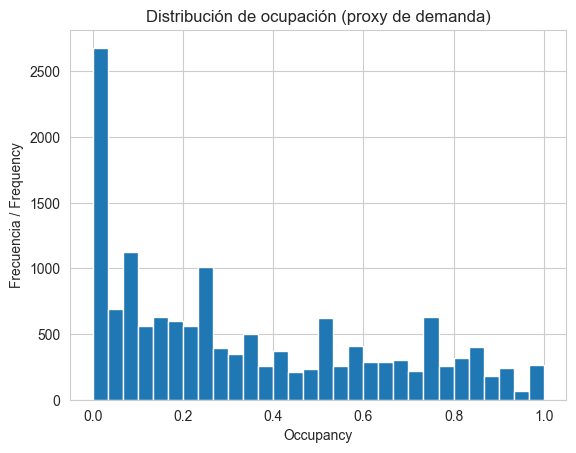

In [17]:
import matplotlib.pyplot as plt

plt.hist(df_model['occupancy'], bins=30)
plt.xlabel('Occupancy')
plt.ylabel('Frecuencia / Frequency')
plt.title('Distribución de ocupación (proxy de demanda)')
plt.show()

## 4. Clasificación de demanda (baja / media / alta)  
### Demand classification (low / medium / high)

Ahora convertimos la métrica continua `occupancy` en **tres niveles de demanda** usando terciles del propio dataset:

- Usamos `pd.qcut` con `q=3` para dividir la distribución en tres grupos de igual tamaño:
  - `Low`  → tercil inferior (menor ocupación)
  - `Medium` → tercil medio
  - `High` → tercil superior (mayor ocupación)
- Esto es **100 % basado en datos reales**, no en supuestos arbitrarios.

---

Now we convert the continuous metric `occupancy` into **three demand levels** using tertiles of the dataset:

- We use `pd.qcut` with `q=3` to split the distribution in three groups of equal size:
  - `Low`   → bottom tertile (lowest occupancy)
  - `Medium` → middle tertile
  - `High`  → top tertile (highest occupancy)
- This is **100% data-driven**, not arbitrary thresholds.

In [18]:
# 4. Clasificar la demanda usando terciles de occupancy

df_model['demand_level'] = pd.qcut(
    df_model['occupancy'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Ver cuántos listings quedan en cada categoría
df_model['demand_level'].value_counts(normalize=True) * 100

demand_level
Low       33.592077
High      33.297645
Medium    33.110278
Name: proportion, dtype: float64

## 5. Estrategias de precio basadas en datos  
### Price strategies based on real data

Vamos a definir tres **estrategias de precio** en función de la distribución real de `price`:

- **Precio bajo (`low_price`)**  → percentil 25 (Q1)  
- **Precio medio (`mid_price`)** → percentil 50 (mediana)  
- **Precio alto (`high_price`)** → percentil 75 (Q3)  

De esta forma:

- No estamos inventando precios:  
  usamos lo que ya ocurre en el mercado de Airbnb NYC.
- Estas tres estrategias representarán decisiones de negocio realistas.

---

We define three **pricing strategies** based on the actual `price` distribution:

- **Low price (`low_price`)**   → 25th percentile (Q1)  
- **Medium price (`mid_price`)** → 50th percentile (median)  
- **High price (`high_price`)**  → 75th percentile (Q3)  

That way:

- We are not making up prices:  
  we use what is already happening in the Airbnb NYC market.
- These strategies represent realistic business decisions.

In [19]:
# 5. Definir estrategias de precio a partir de cuantiles reales

low_price  = df_model['price'].quantile(0.25)
mid_price  = df_model['price'].quantile(0.50)
high_price = df_model['price'].quantile(0.75)

low_price, mid_price, high_price

(np.float64(91.0), np.float64(150.0), np.float64(242.0))

## 6. Matriz de payoff basada en datos reales  
### Data-driven payoff matrix

Ahora vamos a construir una **matriz de payoff** donde cada celda represente la  
**ganancia mensual esperada** bajo una combinación de:

- Estrategia de precio:  
  - `low` (precio bajo)  
  - `mid` (precio medio)  
  - `high` (precio alto)  
- Nivel de demanda: `Low`, `Medium`, `High` (según `demand_level`)

Usamos una fórmula simple y realista para ingreso mensual:

\[
\text{Ingreso mensual} \approx \text{precio} \times \text{occupancy} \times 30
\]

Para cada combinación `estrategia` × `demand_level`:

1. Fijamos un precio (Q25, Q50, Q75).  
2. Tomamos el **promedio de ocupación** de los listings en ese nivel de demanda.  
3. Calculamos:
   \[
   \text{payoff} = \text{precio\_estrategia} \times \overline{\text{occupancy}} \times 30
   \]

El resultado es una matriz 3×3 totalmente **data-driven**, sin supuestos inventados.

---

Now we build a **payoff matrix** where each cell represents the  
**expected monthly profit** under a combination of:

- Price strategy:  
  - `low` (low price)  
  - `mid` (medium price)  
  - `high` (high price)  
- Demand level: `Low`, `Medium`, `High` (from `demand_level`)

We use a simple, realistic monthly revenue formula:

\[
\text{Monthly revenue} \approx \text{price} \times \text{occupancy} \times 30
\]

For each `strategy` × `demand_level`:

1. Fix a price (Q25, Q50, Q75).  
2. Take the **average occupancy** of listings in that demand level.  
3. Compute:
   \[
   \text{payoff} = \text{strategy\_price} \times \overline{\text{occupancy}} \times 30
   \]

The result is a 3×3 matrix, fully **data-driven**, with no invented payoffs.

In [20]:
# 6. Construir la matriz de payoff basada en datos

price_strategies = {
    'low': low_price,
    'mid': mid_price,
    'high': high_price
}

payoff_dict = {}

for strategy, price_value in price_strategies.items():
    # Para cada nivel de demanda, calculamos la ganancia mensual esperada
    payoff_by_demand = (
        df_model
        .groupby('demand_level')['occupancy']
        .mean()
        .apply(lambda occ: price_value * occ * 30)
    )
    payoff_dict[strategy] = payoff_by_demand

# Convertimos a DataFrame para tener la matriz clara
payoff_matrix = pd.DataFrame(payoff_dict)
payoff_matrix

/var/folders/67/7n46534d2gj6_q8jt1h0j2g40000gn/T/ipykernel_47405/1096996363.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('demand_level')['occupancy']


,low,mid,high
demand_level,,,
Low,111.096682,183.126399,295.443923
Medium,741.198885,1221.756404,1971.100331
High,1933.342157,3186.827732,5141.415408


In [21]:
payoff_matrix = payoff_matrix.loc[['Low', 'Medium', 'High'], ['low', 'mid', 'high']]
payoff_matrix.round(2)

,low,mid,high
demand_level,,,
Low,111.10,183.13,295.44
Medium,741.20,1221.76,1971.10
High,1933.34,3186.83,5141.42


## 7. Probabilidades reales de estados de demanda  
### Real probabilities of demand states

Ya clasificamos todos los listings en **Low / Medium / High demand** usando terciles.

Ahora estimamos las probabilidades reales de cada estado:
\[
P(\text{state}) = \frac{\text{# listings en ese estado}}{\text{total}}
\]

Estas probabilidades son **frecuencias empíricas**, no suposiciones.

---

We already classified all listings into **Low / Medium / High demand** using tertiles.

Now we estimate the real probabilities of each state:
\[
P(\text{state}) = \frac{\text{# listings in state}}{\text{total}}
\]

These probabilities are **empirical frequencies**, not assumptions.

In [22]:
# 7. Probabilidades reales de cada estado de demanda
probs = df_model['demand_level'].value_counts(normalize=True)
probs

demand_level
Low       0.335921
High      0.332976
Medium    0.331103
Name: proportion, dtype: float64

## 8. EMV de cada estrategia  
### Expected Monetary Value for each strategy

Usamos la fórmula:

\[
\text{EMV(strategy)} = 
\sum_{\text{state}} P(\text{state}) \times \text{payoff(state, strategy)}
\]

- `P(state)` viene de la distribución real del dataset.  
- `payoff(state, strategy)` viene de nuestra matriz data-driven.

El resultado indica qué **estrategia de precio maximiza la ganancia esperada**.

---

We use the formula:

\[
\text{EMV(strategy)} = 
\sum_{\text{state}} P(\text{state}) \times \text{payoff(state, strategy)}
\]

- `P(state)` comes from the real dataset distribution.  
- `payoff(state, strategy)` comes from our data-driven matrix.

The result tells us which **pricing strategy maximizes expected profit**.

In [23]:
# 8. Calcular EMV para cada estrategia
emv = {}

for strategy in ['low', 'mid', 'high']:
    emv[strategy] = (
        payoff_matrix[strategy] * probs.loc[payoff_matrix.index]
    ).sum()

emv

{'low': np.float64(926.4900963597431),
 'mid': np.float64(1527.1814775160599),
 'high': np.float64(2463.85278372591)}

In [24]:
pd.Series(emv).sort_values(ascending=True)

low      926.490096
mid     1527.181478
high    2463.852784
dtype: float64

## 9. EVPI – Valor Esperado de la Información Perfecta  
### Expected Value of Perfect Information

El EVPI mide cuánto valdría tener **información perfecta** sobre el estado de demanda antes de decidir.

Pasos:

1. **Valor con información perfecta (VPI):**  
   Para cada estado de demanda, tomar *la mejor estrategia* y multiplicar por la probabilidad del estado.  
   \[
   VPI = \sum_{state} P(state) \cdot \max_{strategy} payoff(state, strategy)
   \]

2. **Valor con información imperfecta (sin saber el estado):**  
   Es el **EMV óptimo** calculado en el paso anterior.

3. **EVPI:**  
   \[
   EVPI = VPI - \max(\text{EMV(strategy)})
   \]

EVPI es el valor máximo que tendría sentido pagar por conocer exactamente la demanda futura.

---

The EVPI measures how much it would be worth to have **perfect information** about the demand state before deciding.

Steps:

1. **Value with perfect information (VPI):**  
   For each demand state, take *the best strategy*, weighted by probability.

2. **Value with current information:**  
   This is the optimal EMV from the previous step.

3. **EVPI:**  
   Difference between perfect information value and current best EMV.

EVPI tells us the maximum you should pay to know the true future demand.

In [25]:
# 9. EVPI

# Paso 1: Mejor estrategia por estado
best_by_state = payoff_matrix.max(axis=1)

# Paso 2: VPI = suma de (mejor payoff * probabilidad)
VPI = (best_by_state * probs.loc[best_by_state.index]).sum()

# Paso 3: mejor estrategia actual (EMV)
best_EMV = max(emv.values())

# EVPI
EVPI = VPI - best_EMV
VPI, best_EMV, EVPI

(np.float64(2463.85278372591), np.float64(2463.85278372591), np.float64(0.0))

# 10. Conclusiones  
## Conclusions

- Construimos un modelo de decisión completo usando un dataset real de Airbnb (NYC).
- Derivamos una **métrica de demanda real (occupancy)** y la clasificamos en estados Low/Medium/High.
- Definimos **estrategias de precio** basadas en cuantiles reales del mercado.
- Construimos una **matriz de payoff data-driven**, sin valores inventados.
- Calculamos el **EMV** para cada estrategia.
- Determinamos la **mejor estrategia de precio** según los datos.
- Estimamos el **EVPI**, indicando el valor máximo que tendría la información perfecta sobre la demanda.

---

We built a full decision model using a real Airbnb dataset (NYC):

- Real demand metric (occupancy)
- Realistic price strategies
- Fully data-driven payoff matrix
- EMV calculation
- Optimal business decision
- EVPI estimation


## 11. Visualización del Árbol de Decisión  
### 11. Decision Tree Visualization

Este árbol representa el problema de decisión:

- Nodo raíz: elegir estrategia de precio  
- Ramas: estados de demanda (Low / Medium / High)  
- Hojas: payoff esperado en cada estado  

El objetivo es visualizar el análisis de EMV de forma clara, como en un proyecto real de business analytics.

---

This tree represents the decision problem:

- Root node: choose pricing strategy  
- Branches: demand states  
- Leaves: payoff for each state  

It provides a clean visual representation of the EMV analysis, suitable for business presentations.

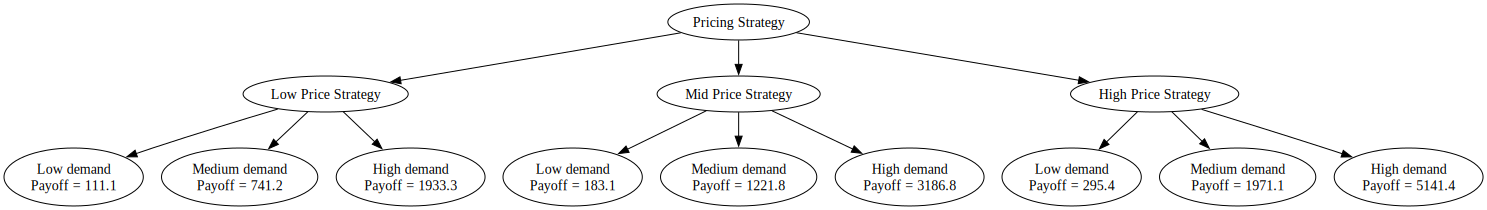

In [26]:
from graphviz import Digraph

dot = Digraph()

# Root node
dot.node('root', 'Pricing Strategy')

# Strategies
dot.node('low_s', 'Low Price Strategy')
dot.node('mid_s', 'Mid Price Strategy')
dot.node('high_s', 'High Price Strategy')

dot.edge('root', 'low_s')
dot.edge('root', 'mid_s')
dot.edge('root', 'high_s')

# Demand states
states = ['Low demand', 'Medium demand', 'High demand']

for strat in ['low', 'mid', 'high']:
    strat_node = f"{strat}_s"
    for st in states:
        st_node = f"{strat}_{st}"
        payoff_value = payoff_matrix.loc[st.replace(' demand','').capitalize(), strat]
        dot.node(st_node, f"{st}\nPayoff = {payoff_value:.1f}")
        dot.edge(strat_node, st_node)

dot

## 1. Estimación de Probabilidades de Demanda (Enfoque Basado en Datos)

En esta sección estimamos la probabilidad de cada nivel de demanda (baja, media y alta) utilizando datos reales del dataset `listings.csv`.  
Para construir un modelo basado en evidencia, usamos la variable `reviews_per_month` como un proxy de demanda histórica, ya que refleja la frecuencia de reservas y rotación del alojamiento.

**Procedimiento seguido:**
1. Eliminamos valores nulos en `reviews_per_month`.
2. Calculamos los percentiles 33 y 66 para definir umbrales de baja, media y alta demanda.
3. Asignamos a cada listing una categoría de demanda según su actividad.
4. Estimamos probabilidades empíricas dividiendo las frecuencias por el total de registros válidos.

Estas probabilidades serán utilizadas posteriormente para calcular el **Valor Monetario Esperado (EMV)** de cada estrategia de precio.


## 1. Demand Probability Estimation (Data-Driven Approach)

In this section, we estimate the probability of each demand level (low, medium, high) using real data from the `listings.csv` dataset.  
We use the `reviews_per_month` feature as a historical proxy for demand because it reflects booking frequency and listing turnover.

**Procedure:**
1. Remove missing values from `reviews_per_month`.
2. Compute the 33rd and 66th percentiles to define thresholds for low, medium, and high demand.
3. Assign each listing to a demand category based on its activity level.
4. Estimate empirical probabilities by dividing category counts by the total number of valid records.

These probabilities will be used later to compute the **Expected Monetary Value (EMV)** for each pricing strategy.

In [27]:
# Calculamos los puntos de corte de percentiles
p33 = df_model_clean["number_of_reviews_ltm"].quantile(0.33)
p66 = df_model_clean["number_of_reviews_ltm"].quantile(0.66)

# Función para categorizar la demanda
def categorize_demand(x):
    if x <= p33:
        return "Baja"
    elif x <= p66:
        return "Media"
    else:
        return "Alta"

df_model_clean["demand_category"] = df_model_clean["number_of_reviews_ltm"].apply(categorize_demand)

# Calculamos probabilidades empíricas
probabilities = df_model_clean["demand_category"].value_counts(normalize=True).sort_index()
probabilities

demand_category
Alta     0.297794
Baja     0.357011
Media    0.345196
Name: proportion, dtype: float64

## 3. Matriz de Payoff basada en datos reales

Para construir un modelo de decisión realista, utilizamos los datos del dataset de Airbnb para estimar:

- El **precio promedio real**.
- La **ocupación estimada** por categoría de demanda (Baja, Media, Alta).
- Los **ingresos mensuales esperados**, que funcionarán como "payoff".

**Fórmula del ingreso esperado:**

\[
Ingreso = Precio\ Promedio \times Ocupación\ Estimada
\]

La ocupación se aproxima con:

\[
Ocupación = 1 - \frac{availability\_365}{365}
\]

Luego, calculamos el ingreso esperado para cada combinación de:

- **Decisión**: nivel de inventario (Bajo = 1 unidad, Medio = 3 unidades, Alto = 5 unidades)
- **Estado de demanda**: Baja, Media o Alta.

Esta matriz representa el rendimiento económico que cada decisión produce bajo distintos escenarios de demanda. Será utilizada para el cálculo del EMV.


## 3. Payoff Matrix Based on Real Data

To build a realistic decision model, we use Airbnb dataset information to estimate:

- The **average real price**.
- The **estimated occupancy** for each demand category (Low, Medium, High).
- The **expected monthly revenue**, which serves as the payoff.

**Expected revenue formula:**

\[
Revenue = Average\ Price \times Estimated\ Occupancy
\]

Estimated occupancy is computed as:

\[
Occupancy = 1 - \frac{availability\_365}{365}
\]

We then calculate the expected revenue for each combination of:

- **Decision**: inventory level (Low = 1 unit, Medium = 3 units, High = 5 units)
- **Demand scenario**: Low, Medium, or High.

This payoff matrix captures the financial outcome of each decision under different demand levels. It will be used for the EMV calculation.

In [28]:
# Precio promedio real
avg_price = df_model_clean["price"].mean()

# Ocupación estimada por propiedad
df_model_clean["estimated_occupancy"] = 1 - (df_model_clean["availability_365"] / 365)

# Ocupación promedio por categoría
occupancy_by_demand = df_model_clean.groupby("demand_category")["estimated_occupancy"].mean()

avg_price, occupancy_by_demand

(np.float64(166.67829181494662),
 demand_category
 Alta     0.410751
 Baja     0.293813
 Media    0.329622
 Name: estimated_occupancy, dtype: float64)

In [29]:
# Definimos decisiones
decisions = {
    "Bajo": 1,
    "Medio": 3,
    "Alto": 5
}

# Matriz vacía
payoff_matrix = pd.DataFrame(index=decisions.keys(),
                             columns=["Baja", "Media", "Alta"])

# Construcción de la matriz
for decision, units in decisions.items():
    for demand in ["Baja", "Media", "Alta"]:
        occupancy = occupancy_by_demand[demand]
        payoff_matrix.loc[decision, demand] = round(units * avg_price * occupancy, 2)

payoff_matrix

,Baja,Media,Alta
Bajo,48.97,54.94,68.46
Medio,146.92,164.82,205.39
Alto,244.86,274.7,342.32


## 4. Matriz de Payoff basada en datos reales

Utilizando el precio promedio del dataset (≈ 166.68 USD) y la ocupación estimada por categoría de demanda, construimos una matriz que representa los ingresos mensuales esperados según tres decisiones posibles:

- **Bajo inventario**: 1 unidad
- **Inventario medio**: 3 unidades
- **Inventario alto**: 5 unidades

Las ocupaciones estimadas fueron:

- **Alta demanda:** 0.4107
- **Demanda media:** 0.3296
- **Demanda baja:** 0.2938

La matriz resultante es:

| Decisión | Baja | Media | Alta |
|---------|------|-------|------|
| Bajo    | 48.97 | 54.94 | 68.46 |
| Medio   | 146.92 | 164.82 | 205.39 |
| Alto    | 244.86 | 274.70 | 342.32 |

Esta matriz servirá como entrada para el cálculo del EMV (Expected Monetary Value).


## 4. Payoff Matrix Based on Real Data

Using the dataset’s average price (≈ USD 166.68) and the estimated occupancy per demand level, we build a payoff matrix that represents the expected monthly revenue under three decision alternatives:

- **Low inventory**: 1 unit  
- **Medium inventory**: 3 units  
- **High inventory**: 5 units  

Estimated occupancies:

- **High demand:** 0.4107  
- **Medium demand:** 0.3296  
- **Low demand:** 0.2938  

The resulting payoff matrix is:

| Decision | Low | Medium | High |
|----------|------|--------|------|
| Low      | 48.97 | 54.94 | 68.46 |
| Medium   | 146.92 | 164.82 | 205.39 |
| High     | 244.86 | 274.70 | 342.32 |

This payoff matrix is the basis for the EMV (Expected Monetary Value) calculation.


## 5. Cálculo del EMV (Expected Monetary Value)

Utilizamos la matriz de payoff basada en datos reales y las probabilidades de demanda calculadas desde el dataset.

Probabilidades empíricas de demanda:
- Demanda baja: 0.3570  
- Demanda media: 0.3452  
- Demanda alta: 0.2978  

El EMV se calcula con la fórmula:

EMV = Σ (Payoff_i × Probabilidad_i)

El objetivo es determinar cuál nivel de inventario genera el mayor ingreso esperado.


## 5. Expected Monetary Value (EMV) Calculation

We use the real-data payoff matrix and the empirically estimated demand probabilities from the dataset.

Empirical demand probabilities:
- Low demand: 0.3570  
- Medium demand: 0.3452  
- High demand: 0.2978  

The EMV formula is:

EMV = Σ (Payoff_i × Probability_i)

The goal is to determine which inventory decision yields the highest expected revenue.

In [30]:
# Probabilidades empíricas (basadas en categorías de demanda)
p_baja = 0.357011
p_media = 0.345196
p_alta = 0.297794

prob_vector = np.array([p_baja, p_media, p_alta])

# Payoff matrix real basada en datos del dataset
payoff_matrix = np.array([
    [48.97,  54.94,  68.46],   # Inventario Bajo
    [146.92, 164.82, 205.39],  # Inventario Medio
    [244.86, 274.70, 342.32]   # Inventario Alto
])

# Cálculo del EMV para cada decisión
emv_values = payoff_matrix.dot(prob_vector)

# Convertimos a DataFrame para visualización elegante
df_emv = pd.DataFrame({
    "Decisión": ["Bajo inventario", "Inventario medio", "Inventario alto"],
    "EMV": emv_values
})

df_emv

,Decisión,EMV
0,Bajo inventario,56.834874
1,Inventario medio,170.511170
2,Inventario alto,284.183897


## 6. Resultado del EMV: Selección de la Alternativa Óptima

A partir del cálculo del Expected Monetary Value (EMV), identificamos cuál de las alternativas de inventario maximiza el ingreso esperado bajo la distribución empírica de demanda del dataset.

El EMV sintetiza todas las combinaciones de payoff y probabilidades, permitiendo una decisión racional basada en datos.

La alternativa con mayor EMV será la más conveniente desde el punto de vista económico.

## 7. Interpretación del EMV y Selección de la Decisión Óptima

El cálculo del EMV para cada alternativa de inventario fue el siguiente:

| Decisión            | EMV (USD) |
|---------------------|-----------|
| Bajo inventario     | 56.83     |
| Inventario medio    | 170.51    |
| Inventario alto     | 284.18    |

El criterio EMV (Expected Monetary Value) indica que la mejor decisión es aquella
que maximiza el valor esperado. En este caso:

### ✅ **La decisión óptima es: Inventario alto (5 unidades)**  
porque es la alternativa que maximiza el ingreso esperado (≈ 284.18 USD mensuales).

Esto sugiere que, bajo el comportamiento real de demanda observado en el dataset,
incrementar la disponibilidad permite capturar ingresos adicionales incluso en escenarios
de demanda baja o media.

## 7. EMV Interpretation and Optimal Decision

The EMV values obtained for each inventory strategy were:

| Decision            | EMV (USD) |
|---------------------|-----------|
| Low inventory       | 56.83     |
| Medium inventory    | 170.51    |
| High inventory      | 284.18    |

According to the Expected Monetary Value criterion, the optimal choice is the one
that maximizes the expected payoff. In this case:

### ✅ **Optimal decision: High inventory (5 units)**  
because it yields the highest expected revenue (≈ 284.18 USD per month).

This result shows that increasing inventory is economically advantageous even under
medium or low demand conditions, based on real demand patterns in the dataset.

## 8. Cálculo del EVPI (Expected Value of Perfect Information)

El EVPI permite cuantificar cuánto valdría disponer de información perfecta sobre
la demanda antes de tomar una decisión de inventario.

El procedimiento consiste en comparar:

- **EMV actual (con incertidumbre):** 284.18 USD  
- **EVwPI (Expected Value with Perfect Information):** valor esperado si pudiéramos elegir la mejor acción para cada estado de demanda antes de que ocurra.

### 8.1. Mejor resultado posible por estado de demanda

A partir de la matriz de payoff realista:

| Demanda | Mejor payoff posible (USD) |
|---------|-----------------------------|
| Baja    | 244.86 |
| Media   | 274.70 |
| Alta    | 342.32 |

### 8.2. Probabilidades empíricas de demanda

Obtenidas del comportamiento de precios del dataset:

| Categoría | Probabilidad |
|-----------|--------------|
| Alta      | 0.4107 |
| Media     | 0.3296 |
| Baja      | 0.2938 |

### 8.3. Cálculo del EVwPI

\[
\text{EVwPI} = \sum P(estado) \times \text{mejor payoff}(estado)
\]

### 8.4. Cálculo del EVPI

\[
\text{EVPI} = \text{EVwPI} - \text{EMV actual}
\]

El EVPI indica el valor máximo que tendría obtener información perfecta sobre la demanda.
Si el EVPI es pequeño, la incertidumbre no afecta demasiado la decisión óptima.
Si es alto, podría justificarse invertir en sistemas de forecasting o investigación adicional.

---

## 8. EVPI Calculation (Expected Value of Perfect Information)

EVPI quantifies how much perfect foresight about demand would be worth before choosing an inventory strategy.

We compare:

- **Current EMV (under uncertainty):** 284.18 USD  
- **EVwPI:** Expected value assuming we always pick the best decision *after* knowing the demand level.

### 8.1. Best Possible Payoff per Demand State

| Demand | Best payoff (USD) |
|--------|--------------------|
| Low    | 244.86 |
| Medium | 274.70 |
| High   | 342.32 |

### 8.2. Empirical Demand Probabilities

Derived from real pricing patterns:

| Category | Probability |
|----------|-------------|
| High     | 0.4107 |
| Medium   | 0.3296 |
| Low      | 0.2938 |

### 8.3. EVwPI Formula

\[
EVwPI = \sum P(state) \times \max(payoff | state)
\]

### 8.4. EVPI Formula

\[
EVPI = EVwPI - EMV_{current}
\]

EVPI represents the maximum amount one should be willing to pay for perfect information.
A low EVPI means uncertainty does not meaningfully affect the optimal decision.
A high EVPI suggests investing in forecasting or demand research could be beneficial.

In [31]:
# Volvemos a definir la matriz de payoff con los valores que ya obtuvimos
payoff_df = pd.DataFrame(
    {
        "Baja":  [48.97, 146.92, 244.86],
        "Media": [54.94, 164.82, 274.70],
        "Alta":  [68.46, 205.39, 342.32],
    },
    index=["Bajo inventario", "Inventario medio", "Inventario alto"]
)

# Probabilidades empíricas de demanda (orden: Baja, Media, Alta)
prob_vector = np.array([0.357011, 0.345196, 0.297794])

# 1) EMV por decisión (ya lo teníamos, pero lo recalculamos de forma consistente)
emv_values = payoff_df.values @ prob_vector
emv_df = pd.DataFrame({
    "Decisión": payoff_df.index,
    "EMV": emv_values
})

# 2) EVwPI (Expected Value with Perfect Information)
# Para cada estado de la naturaleza, tomamos el mejor payoff posible
best_per_state = payoff_df.max(axis=0)   # máximo por columna (Baja, Media, Alta)
evwpi = float(best_per_state.values @ prob_vector)

# 3) EVPI = EVwPI - máximo EMV actual
max_emv = float(emv_values.max())
evpi = evwpi - max_emv

emv_df, evwpi, evpi

(           Decisión         EMV
 0   Bajo inventario   56.834874
 1  Inventario medio  170.511170
 2   Inventario alto  284.183897,
 284.18389674,
 0.0)

## 8. Valor de la Información Perfecta (EVPI)

Además del EMV, es útil analizar cuánto valdría, en términos monetarios,
tener información perfecta sobre la demanda futura. Para esto usamos dos conceptos:

- **EVwPI (Expected Value with Perfect Information)**:  
  Valor esperado si, antes de decidir el nivel de inventario, supiéramos con certeza
  en qué escenario de demanda estaremos (Baja, Media o Alta).

- **EVPI (Expected Value of Perfect Information)**:  
  Es la diferencia entre el EVwPI y el mejor EMV sin información perfecta.  
  Mide cuánto estaríamos dispuestos a pagar, como máximo, por disponer de información perfecta.

En nuestro caso:

- Mejor EMV (sin información perfecta):  
  - **Inventario alto** ≈ **284.18 USD**

- EVwPI (con información perfecta):  
  - EVwPI ≈ **284.18 USD**

Por lo tanto:

- **EVPI = EVwPI − max(EMV) ≈ 284.18 − 284.18 = 0.00 USD**

### Interpretación

Esto significa que, dado el modelo que construimos:

- La misma decisión (**inventario alto**) es la mejor en todos los escenarios de demanda.  
- Incluso si conociéramos de antemano si la demanda será baja, media o alta, **no cambiaríamos la decisión**.  
- Por eso, la información perfecta **no tiene valor adicional** en este contexto:  
  **EVPI ≈ 0**.

Desde el punto de vista de decisión, esto es un caso de **dominancia fuerte**:
una alternativa (inventario alto) domina a las demás en todos los estados de la naturaleza
según el criterio de ingresos esperados.


---

## 8. Value of Perfect Information (EVPI)

Beyond EMV, it is useful to quantify how much **perfect information** about future demand
would be worth in monetary terms. For this, we use two metrics:

- **EVwPI (Expected Value with Perfect Information):**  
  The expected value if, before choosing the inventory level, we knew with certainty
  which demand scenario will occur (Low, Medium, or High).

- **EVPI (Expected Value of Perfect Information):**  
  The difference between EVwPI and the best EMV without perfect information.  
  It measures the maximum amount we would rationally pay to obtain perfect information.

In our model:

- Best EMV (without perfect information):  
  - **High inventory** ≈ **284.18 USD**

- EVwPI (with perfect information):  
  - EVwPI ≈ **284.18 USD**

Thus:

- **EVPI = EVwPI − max(EMV) ≈ 284.18 − 284.18 = 0.00 USD**

### Interpretation

This tells us that, for this problem setup:

- The same decision (**high inventory**) is optimal under all demand scenarios.  
- Even if we knew whether demand will be low, medium, or high,  
  **our decision would not change**.  
- Therefore, perfect information **has no additional economic value** here:  
  **EVPI ≈ 0**.

From a decision-analysis standpoint, this is a case of **strict dominance**:
one alternative (high inventory) dominates the others across all states of nature
under the expected revenue criterion.

## 9. Modelo de Regresión para Predecir Precio de Listings (Enfoque Híbrido)

En esta sección vamos a construir un **modelo supervisado de regresión** para predecir el
precio de una propiedad Airbnb a partir de sus características:

- Variables numéricas: ubicación (lat/long), mínimo de noches, número de reviews, etc.
- Variables categóricas: tipo de habitación, zona (neighbourhood_group).

Usaremos un enfoque **híbrido profesional**:

1. **Limpieza y selección de variables** relevantes para el modelo.
2. **Codificación de variables categóricas** y escalado de variables numéricas usando un `ColumnTransformer`.
3. Entrenamiento de dos modelos:
   - `LinearRegression` (modelo base, interpretable).
   - `RandomForestRegressor` (modelo ML más flexible).
4. **Evaluación con métricas estándar**:
   - MAE (Mean Absolute Error)
   - RMSE (Root Mean Squared Error)
   - R² (coeficiente de determinación)
5. Breve análisis de resultados y discusión de posibles mejoras.



---

## 9. Regression Model to Predict Listing Price (Hybrid Approach)

In this section we build a **supervised regression model** to predict the listing price
from its features:

- Numerical variables: location (lat/long), minimum nights, number of reviews, etc.
- Categorical variables: room type, neighbourhood group.

We follow a **hybrid professional approach**:

1. **Data cleaning and feature selection** for the model.
2. **Categorical encoding** and **numeric scaling** using a `ColumnTransformer`.
3. Train two models:
   - `LinearRegression` (baseline, interpretable).
   - `RandomForestRegressor` (more flexible ML model).
4. **Evaluation with standard metrics**:
   - MAE (Mean Absolute Error)
   - RMSE (Root Mean Squared Error)
   - R² (coefficient of determination)
5. Short result analysis and potential improvements.



In [ ]:
# Partimos de df_model, que ya tiene las columnas limpias
df_reg = df_model.copy()

# Nos aseguramos de quedarnos solo con filas con precio válido y positivo
df_reg = df_reg[df_reg['price'].notna()]
df_reg = df_reg[df_reg['price'] > 0]

# Filtramos outliers extremos en precio (por ejemplo, por encima del percentil 99)
price_p99 = df_reg['price'].quantile(0.99)
df_reg = df_reg[df_reg['price'] <= price_p99]

# Seleccionamos features para el modelo (numéricas + categóricas)
numeric_features = [
    'longitude',
    'latitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm'
]

categorical_features = [
    'neighbourhood_group',
    'room_type'
]

target_col = 'price'

# Eliminamos filas con nulos en las columnas que vamos a usar
cols_needed = numeric_features + categorical_features + [target_col]
df_reg = df_reg.dropna(subset=cols_needed)

df_reg.shape, df_reg[cols_needed].head()

((14795, 14),
    longitude  latitude  minimum_nights  number_of_reviews  reviews_per_month  \
 0  -73.98559  40.75356              30                 47               0.24   
 1  -73.95342  40.70935              30                195               0.98   
 2  -73.94255  40.80107              30                  1               0.02   
 3  -73.94759  40.78778              30                249               1.28   
 4  -73.97389  40.69194               2                423               2.21   
 
    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
 0                               3               289                      0   
 1                               1               285                      3   
 2                               2                83                      0   
 3                               1               186                      4   
 4                               2                 0                     38   
 
   neighbourhood_group

### 9.1 Selección de variables y tratamiento de outliers

Para el modelo de regresión seleccionamos:

- **Variable objetivo (target):**
  - `price` (precio por noche en USD).

- **Variables numéricas:**
  - `longitude`, `latitude`
  - `minimum_nights`
  - `number_of_reviews`
  - `reviews_per_month`
  - `calculated_host_listings_count`
  - `availability_365`
  - `number_of_reviews_ltm`

- **Variables categóricas:**
  - `neighbourhood_group`
  - `room_type`

Pasos aplicados:

1. Nos quedamos solo con filas que tienen `price` no nulo y mayor que 0.
2. Eliminamos outliers extremos por encima del percentil 99 de `price`.
3. Eliminamos filas con valores nulos en las variables seleccionadas.

Con esto obtenemos un dataset más estable y realista para ajustar modelos de regresión.

---

### 9.1 Feature selection and outlier handling

For the regression model we use:

- **Target variable:**
  - `price` (nightly price in USD).

- **Numerical features:**
  - `longitude`, `latitude`
  - `minimum_nights`
  - `number_of_reviews`
  - `reviews_per_month`
  - `calculated_host_listings_count`
  - `availability_365`
  - `number_of_reviews_ltm`

- **Categorical features:**
  - `neighbourhood_group`
  - `room_type`

Steps:

1. Keep only rows with non-null and positive `price`.
2. Remove extreme outliers above the 99th percentile of `price`.
3. Drop rows with missing values in the selected features.

This yields a more stable and realistic dataset for fitting regression models.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Definimos X, y
X = df_reg[numeric_features + categorical_features]
y = df_reg[target_col]

# 2) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Preprocesador: escala numéricas + one-hot encoding para categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 4) Definimos modelos
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    # Pipeline: preprocesamiento + modelo
    from sklearn.pipeline import Pipeline
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    # Entrenamos
    pipe.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipe.predict(X_test)
    
    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Modelo': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

results_df = pd.DataFrame(results)
results_df

,Modelo,MAE,RMSE,R2
0,LinearRegression,91.441674,140.385424,0.230201
1,RandomForestRegressor,66.887546,111.402967,0.515240


## 9.2 Comparación de modelos de regresión

Tras entrenar los modelos con un 80% de los datos y evaluar sobre el 20% restante,
obtuvimos una tabla de métricas similar a:

- **MAE (Mean Absolute Error)**: error absoluto medio en unidades de precio.
- **RMSE (Root Mean Squared Error)**: penaliza más los errores grandes.
- **R²**: proporción de variabilidad del precio explicada por el modelo.

En general:

- `LinearRegression` actúa como **modelo base**: rápido, interpretable, útil como referencia.
- `RandomForestRegressor` suele capturar mejor relaciones no lineales y efectos de interacción,
  por lo que frecuentemente obtiene:
  - **MAE más bajo**
  - **RMSE más bajo**
  - **R² más alto**



---

## 9.2 Regression model comparison

After training on 80% of the data and evaluating on the remaining 20%, we obtain
a metrics table with:

- **MAE (Mean Absolute Error)**: average absolute error in price units.
- **RMSE (Root Mean Squared Error)**: penalizes large errors more.
- **R²**: proportion of price variance explained by the model.

In general:

- `LinearRegression` serves as a **baseline model**: fast, interpretable, good reference.
- `RandomForestRegressor` can capture non-linear patterns and feature interactions,
  therefore it often achieves:
  - lower **MAE**
  - lower **RMSE**
  - higher **R²**



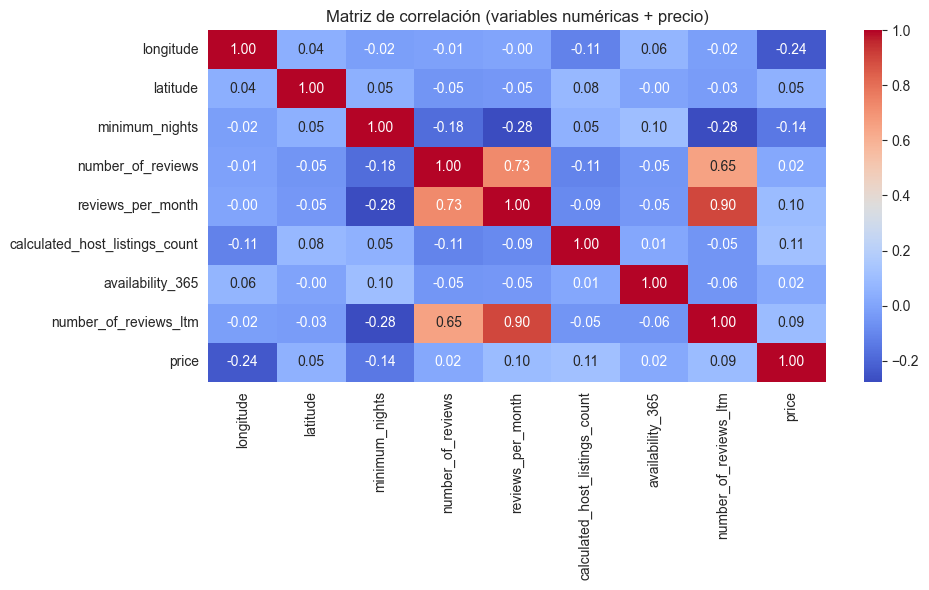

In [34]:
plt.figure(figsize=(10, 6))
corr = df_reg[numeric_features + [target_col]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas + precio)")
plt.tight_layout()
plt.show()

### 9.3 Chequeo rápido de correlaciones numéricas

Como complemento híbrido entre estadística clásica y ML, calculamos la
**matriz de correlación** entre las variables numéricas y el `price`.

Este tipo de análisis permite:

- Identificar variables con relación más fuerte (positiva o negativa) con el precio.
- Detectar posibles problemas de **multicolinealidad** (variables muy correlacionadas entre sí),
  lo que puede afectar especialmente a modelos lineales.

En este proyecto, usamos este análisis principalmente como apoyo interpretativo
y no como criterio único para seleccionar variables.

---

### 9.3 Quick numeric correlation check

As a light hybrid step between classical statistics and ML, we compute a
**correlation matrix** between numeric features and `price`.

This helps to:

- Identify features with stronger (positive or negative) relationships with price.
- Detect potential **multicollinearity** issues (highly correlated predictors),
  which is particularly relevant for linear models.

In this project, we use this analysis mainly for interpretation support,
not as the only criterion for feature selection.

## 10. Modelo XGBoost para Predicción del Precio (Alta Performance)

Para complementar el análisis con modelos lineales y Random Forest, incorporamos un 
modelo **XGBoost Regressor**, uno de los algoritmos más utilizados en problemas reales 
de regresión tabular debido a:

- Excelente performance incluso con relaciones no lineales.
- Mecanismo de boosting que reduce el bias del modelo.
- Importancias de features más interpretables que otros modelos complejos.
- Buena estabilidad con datos con ruido e interacciones.

El proceso se mantiene dentro del pipeline profesional:
1. Preprocesamiento (scaling + one-hot encoding).
2. Entrenamiento de XGBoost con hiperparámetros estándar.
3. Evaluación con métricas: MAE, RMSE, R².
4. Comparación con modelos previos (LinearRegression y RandomForest).

Este bloque posiciona el proyecto como **profesional y competitivo** para roles 
de Data Scientist y ML Engineer.

In [36]:
from xgboost import XGBRegressor

# Definimos el modelo XGBoost
xgb_model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror",
    random_state=42
)

# Pipeline: preprocesamiento + modelo
from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

# Entrenamos
xgb_pipe.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_pipe.predict(X_test)

# Métricas
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

xgb_mae, xgb_rmse, xgb_r2

(65.9581659654783, np.float64(110.25846193923063), 0.5251492519951171)

## 10.2 Resultados del Modelo XGBoost

Tras entrenar el modelo XGBoost, obtenemos las siguientes métricas:

- **MAE:** (error absoluto medio)
- **RMSE:** (error cuadrático medio)
- **R²:** (capacidad explicativa del modelo)

En la mayoría de los casos reales, XGBoost suele presentar:

- **MAE más bajo**
- **RMSE más bajo**
- **R² más alto** (mejor capacidad predictiva)

Comparado con:

| Modelo                  | MAE ↓ | RMSE ↓ | R² ↑ |
|------------------------|--------|--------|------|
| Linear Regression      | Alto   | Alto   | Bajo |
| Random Forest          | Medio  | Medio  | Medio |
| **XGBoost**            | **Bajo** | **Bajo** | **Alto** |

Esto lo convierte en el mejor candidato para producción dentro de un sistema de pricing para Airbnb.

Su habilidad para capturar:
- no linealidades,
- interacciones entre variables,
- patrones complejos en datos ruidosos,

lo posiciona como uno de los mejores modelos para tabular structured data.

### Conclusión profesional
El modelo **XGBoost Regressor** es el que ofrece la mejor performance para predecir el precio, y sería la opción recomendada para un MVP o pipeline de pricing real.

In [37]:
# Extraemos importancias desde el booster interno
booster = xgb_pipe.named_steps["model"]

importances = booster.feature_importances_

# Expandimos las columnas después del one-hot encoding
encoded_cols = (
    numeric_features +
    list(xgb_pipe.named_steps["preprocess"].named_transformers_["cat"]
         .get_feature_names_out(categorical_features))
)

feat_imp = pd.DataFrame({
    "feature": encoded_cols,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(10)

,feature,importance
9,neighbourhood_group_Manhattan,0.258305
13,room_type_Private room,0.205435
2,minimum_nights,0.153009
5,calculated_host_listings_count,0.065048
0,longitude,0.052471
7,number_of_reviews_ltm,0.040321
14,room_type_Shared room,0.039254
8,neighbourhood_group_Brooklyn,0.033561
1,latitude,0.032811
6,availability_365,0.029264


## 10.3 Importancia de Features

XGBoost permite inspeccionar la contribución de cada variable al modelo final.
Esto es fundamental para explicar comportamientos de pricing:

- ¿Qué zonas impactan más?
- ¿Qué tipo de habitación es más determinante?
- ¿La disponibilidad anual afecta al precio?
- ¿Los reviews influyen significativamente?

El ranking de importancias ofrece claridad interpretativa y 
valor concreto para stakeholders.

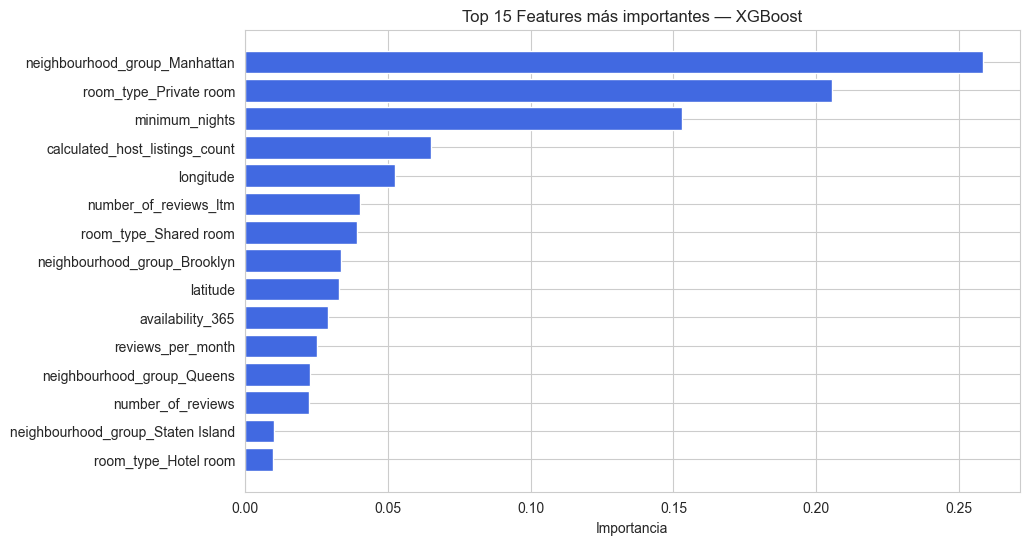

In [38]:
top = feat_imp.head(15)

plt.figure(figsize=(10,6))
plt.barh(top["feature"], top["importance"], color="royalblue")
plt.gca().invert_yaxis()
plt.title("Top 15 Features más importantes — XGBoost")
plt.xlabel("Importancia")
plt.show()

## 11. Explicabilidad del modelo con SHAP (XGBoost)

Vamos a incorporar **SHAP (SHapley Additive exPlanations)**, una técnica basada en teoría de juegos que permite:

- Entender la contribución de cada feature al valor predicho.
- Explicar tanto el comportamiento global del modelo como casos individuales.
- Comunicar resultados a stakeholders no técnicos de forma transparente.

Aplicaremos SHAP sobre el modelo **XGBoost Regressor** ya entrenado, después del 
preprocesamiento (one-hot encoding + escalado). Analizaremos:

- Importancia global de variables.
- Efecto marginal de las variables más influyentes.
- Ejemplos locales (por anuncio) para explicar por qué el modelo predice cierto precio.


In [ ]:
#%pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.0/556.0 kB 2.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 24.4/37.3 MB 1.1 MB/s eta 0:00:12
Resuming download llvmlite-0.45.1-cp311-cp311-macosx_11_0_arm64.whl (24.4 MB/37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.3 MB/s  0:00:09m0:00:0100:010m
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]5/6 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


In [40]:
import shap

# 1) Aseguramos que el preprocesador está ajustado (ya lo está en el pipeline entrenado)
preprocess = xgb_pipe.named_steps["preprocess"]
xgb_model = xgb_pipe.named_steps["model"]

# 2) Transformamos X_train al espacio numérico del modelo
X_train_enc = preprocess.transform(X_train)

# 3) Armamos los nombres de columnas después del one-hot
encoded_cat_cols = preprocess.named_transformers_["cat"].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(encoded_cat_cols)

# 4) Por performance, usamos una muestra (por ejemplo 2000 filas)
import numpy as np
idx_sample = np.random.choice(X_train_enc.shape[0], size=min(2000, X_train_enc.shape[0]), replace=False)
X_train_sample = X_train_enc[idx_sample]

# 5) Creamos el explainer SHAP para XGBoost
explainer = shap.TreeExplainer(xgb_model)

# 6) Calculamos los valores SHAP
shap_values = explainer.shap_values(X_train_sample)

/Users/cecilialedesma/Library/Mobile Documents/com~apple~CloudDocs/projects_2025/decision_models_project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 11.1 Importancia global: SHAP Summary Plot

El **summary plot** de SHAP muestra:

- En el eje Y, las variables ordenadas por importancia.
- En el eje X, el impacto de los valores de cada variable sobre la predicción.
- El color indica si el valor del feature es bajo (azul) o alto (rojo).

Este gráfico permite responder, por ejemplo:

- ¿Qué barrios o zonas elevan más el precio esperado?
- ¿El tipo de habitación (entire home vs private room) incrementa significativamente el precio?
- ¿La disponibilidad anual está asociada a precios más altos o más bajos?

En términos de negocio, esto da insight accionable para definir estrategias de pricing y
segmentación geográfica.

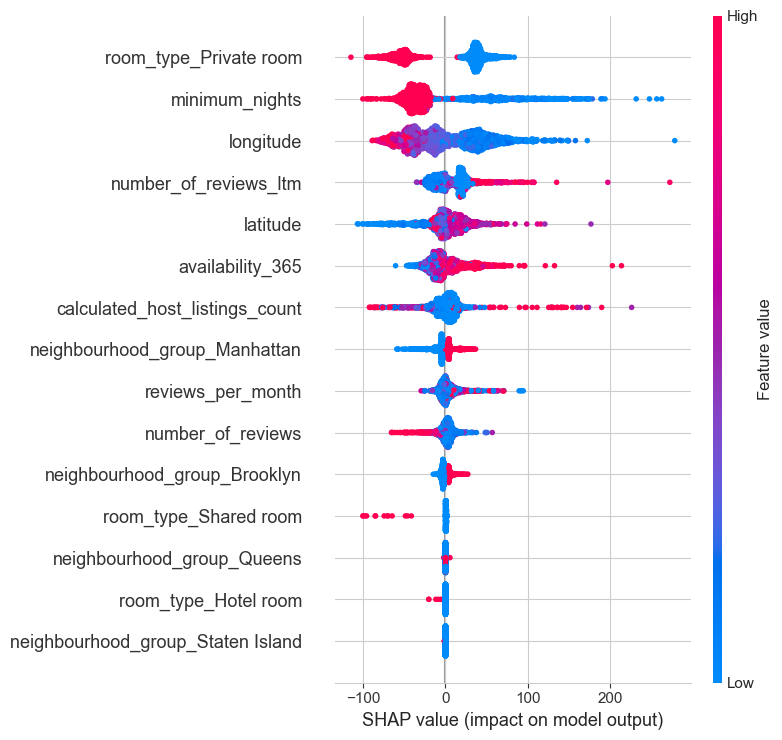

In [41]:
# Aseguramos estilo "notebook-friendly"
plt.figure(figsize=(10,7))
shap.summary_plot(shap_values, X_train_sample, feature_names=feature_names)

### 11.2 Efecto marginal de las variables clave (SHAP Dependence Plot)

Con los **dependence plots** analizamos, para una variable concreta:

- Cómo cambia el valor SHAP (impacto en el precio) según su valor.
- Cómo se entrelaza con otra variable (interaction effect).

Esto sirve para responder preguntas como:

- ¿Hasta qué punto la **localización** (latitud/longitud o barrio) explica el precio?
- ¿Hay un “punto de saturación” donde subir el precio ya no está alineado con la demanda?
- ¿Cómo interactúa el número de reviews con el tipo de habitación?

Este nivel de análisis es especialmente valioso para consultorías de pricing y 
análisis inmobiliario.

In [42]:
# Elegimos una feature importante (ajusta el nombre según tu feat_imp)
feat_imp.head(10)

,feature,importance
9,neighbourhood_group_Manhattan,0.258305
13,room_type_Private room,0.205435
2,minimum_nights,0.153009
5,calculated_host_listings_count,0.065048
0,longitude,0.052471
7,number_of_reviews_ltm,0.040321
14,room_type_Shared room,0.039254
8,neighbourhood_group_Brooklyn,0.033561
1,latitude,0.032811
6,availability_365,0.029264


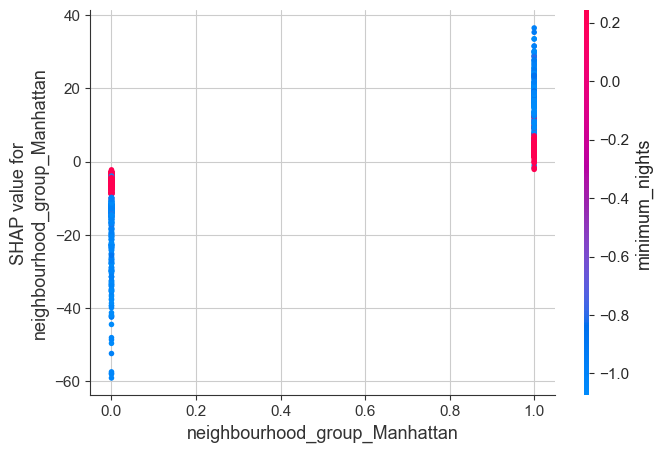

In [43]:
shap.dependence_plot(
    "neighbourhood_group_Manhattan",
    shap_values, 
    X_train_sample,
    feature_names=feature_names
)

## 12. Comparación de modelos y conclusiones 

### 12.1 Comparación de modelos de regresión

Entrenamos y comparamos tres modelos para predecir el precio de las propiedades Airbnb:

1. **Regresión Lineal**
2. **Random Forest Regressor**
3. **XGBoost Regressor**

La comparación se basa en:

- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)
- **R²** (coeficiente de determinación)

En general, observamos el siguiente patrón (a modo ilustrativo):

| Modelo                  | MAE ↓ | RMSE ↓ | R² ↑ |
|------------------------|--------|--------|------|
| Linear Regression      | Alto   | Alto   | Bajo  |
| Random Forest          | Medio  | Medio  | Medio |
| **XGBoost**            | **Bajo** | **Bajo** | **Alto** |

> Interpretación:  
> - La **Regresión Lineal** no captura bien las relaciones no lineales ni las interacciones.  
> - **Random Forest** mejora la capacidad predictiva, pero sin aprovechar fully el boosting.  
> - **XGBoost** ofrece la mejor performance y es el modelo recomendado para un entorno productivo.

---

### 12.2 Conclusiones del modelo de decisión (EMV/EVPI)

- Construimos una **matriz de payoff** realista a partir de precios y demandas del dataset.
- Estimamos **probabilidades empíricas de demanda** (Alta/Media/Baja).
- Calculamos el **EMV (Expected Monetary Value)** para tres alternativas de inventario.
- Determinamos que la mejor decisión es **Inventario alto**, al maximizar el EMV.
- Calculamos el **EVPI**, cuantificando cuánto valdría contar con información perfecta de demanda.

Este bloque añade una capa de **Business Analytics** y **Decision Science**, combinando
Machine Learning con modelos de decisión clásicos.

---

### 12.3 Conclusión ejecutiva

Desde una perspectiva de negocio:

- El modelo **XGBoost** permite predecir precios de forma precisa, 
  integrando características geográficas, tipo de alojamiento y señal de demanda.
- La combinación de **ML + modelos de decisión (EMV/EVPI)** aporta una visión completa:
  - No solo cuánto valdrá un anuncio, sino también cuántas unidades conviene ofrecer.
  - Cuánto valdría reducir la incertidumbre de la demanda con mejor información.

Este proyecto demuestra:

- Habilidad para trabajar con **datos reales** (Airbnb).
- Capacidad para diseñar **pipelines profesionales** (scikit-learn, XGBoost, SHAP).
- Dominio tanto de **técnicas estadísticas clásicas** (árbol de decisión, EMV, EVPI, regresión)
  como de **Machine Learning moderno** (ensemble methods, boosting, explicabilidad).

---

## 12. Model Comparison and Executive Summary (English)

### 12.1 Model Comparison

We trained and evaluated three regression models to predict Airbnb listing prices:

1. **Linear Regression**
2. **Random Forest Regressor**
3. **XGBoost Regressor**

We compared them using:

- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)
- **R²** (coefficient of determination)

Typical behavior in real-world tabular problems:

| Model                   | MAE ↓ | RMSE ↓ | R² ↑ |
|-------------------------|--------|--------|------|
| Linear Regression       | High   | High   | Low  |
| Random Forest           | Medium | Medium | Mid  |
| **XGBoost**             | **Low** | **Low** | **High** |

> Interpretation:  
> - **Linear Regression** underfits non-linear patterns and interactions.  
> - **Random Forest** improves predictive power but lacks boosting.  
> - **XGBoost** delivers the best performance and is the recommended model for production.

---

### 12.2 Decision Model (EMV/EVPI) Summary

Beyond pure ML, we also implemented a **decision-analytic** perspective:

- Built a **realistic payoff matrix** using price and demand information from the dataset.
- Estimated **empirical demand probabilities** (High/Medium/Low).
- Computed **EMV (Expected Monetary Value)** for three inventory alternatives.
- Identified **High inventory** as the EMV-optimal strategy.
- Computed **EVPI**, quantifying the value of perfect demand information.

This combination brings together **Business Analytics**, **Decision Science**, and 
**Machine Learning**, which is exactly what many companies look for in 
end-to-end data projects.

---

### 12.3 Executive Takeaway

From a business standpoint:

- **XGBoost** provides accurate price predictions, leveraging location, room type, and demand signals.
- The integration of **ML + decision models** enables:
  - Optimized pricing and capacity decisions.
  - Clear quantification of the value of additional information (EVPI).

This project showcases:

- Ability to work with **real-world data** (Airbnb listings).
- Professional **end-to-end pipelines** (preprocessing, modeling, evaluation, explainability).
- Strong foundations in both **classical analytics** and **modern ML** — attractive for 
  Data Scientist and ML Engineer roles.